<a href="https://colab.research.google.com/github/jasunburdick/Teacher/blob/master/ET_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This first section is just for practice to show you what Python can do
# These are comments they look green and are not part of the code just used to help document
# Comment lines start with a #

# In this document the symbol "# # #" is used to help you find sections of the code to change
# In the name variable below, remove the name Jane and type your name, leave the quotes
# Hit the play button at the left and look at the bottom of this section
# Feel free to change anything in this section it will not affect anything below
# Remove the # in front of the third print statement to make it work
# Experiment and continue after this lab to keep learning. https://www.learnpython.org/

# # # # # # # # # #
name = "jasun"
print("Hi " + name + ", Lets explore python and the Traveling Salesman Problem.")
print("Python does math: 2 + 2 =", 2+2)
print("Make your own " + "commas seperate data types.", 1 == 1)
# # # # # # # # # #

Hi jasun, Lets explore python and the Traveling Salesman Problem.
Python does math: 2 + 2 = 4
Make your own commas seperate data types. True


## Section 1: Setting up the file and city locations

*   To begin make a new file by clicking on the folder icon at the left and then right clicking under the sample data folder to create a new file
*   Name the file "cities.txt" without the quotes.  Hit enter then double click the file name
*   Copy paste the highlighted city data from the TSP spreadsheet (location, x, y) into the cities.txt file in the right frame
*   Begin running all the play buttons next to each section.  Read the comments in green to help understand what each section is doing.  You may get a warning about reading files.



In [3]:
# This imports a math library so we can do square roots later
import math

# Opens the cities.txt file and read it into variable f
f = open("cities.txt", "r")

# This defines the distance between any two cities using the Pythagorean Theorem
# This will be used later in two different sections
def distance(a,b):
  x1, y1 = cityList[a][1], cityList[a][2]
  x2, y2 = cityList[b][1], cityList[b][2]
  # Here we use the math library's sqrt function
  dist = math.sqrt((y2 - y1)**2 + (x2 - x1)**2)
  # End of function: Return the distance
  return dist

# This turns the city.txt file data into a list called cityArray
cityList = []
for loc in f:
  loc = loc.replace("\n", "")
  loc = loc.split('	')
  loc[1] = float(loc[1])
  loc[2] = float(loc[2])
  cityList.append(loc)

# Prints the list of cities and locations
print("Here is the list of cities:", cityList)
print("Number of cities:", len(cityList))

Here is the list of cities: [['a', 4.0, 2.0], ['b', 5.0, 9.0], ['c', 3.0, -1.0], ['d', 7.0, -4.0], ['e', 18.0, -9.0], ['f', 2.0, 10.0], ['g', 5.0, 8.0]]
Number of cities: 7


# Section 2: Path Predictions.

The variable "order" has a string of numbers which represent the order to visit the cities.
Change the order to match your prediction keep city 1 first.



In [4]:
# This is the predicted order to visit the cities feel free to change this
# If you have 5 cities place the numbers 1-5 in the correct order to visit
# Examples: 1,2,3,4,5 or 1,3,5,2,4 or 1,5,3,4,2
# If you have more or less cities change the amount of numbers
# Run the play button at the left and look at the path distance at the bottom of this section
# Keep trying till you find the shortest path

# # # # # # # # #
order = "1,3,4,2,5,6,7"   # Change these numbers, make sure you use commas and quotes around the outside
# # # # # # # # #

# Convert string to list of integers and subtract 1 for list position
order = order.split(',')
for i in range(len(order)):
  order[i] = int(order[i])-1

# Calculates path distance based on order given
pathDistance = 0
for i in range(len(order)-1):
  pathDistance += distance(order[i], order[i+1])     # Use the distance formula and add it to the path distance
pathDistance += distance(order[-1], order[0])        # This is the last path back to the beginning start

for i in range(len(order)):
  print(cityList[order[i]])
print("Path Distance: ", pathDistance)


['a', 4.0, 2.0]
['c', 3.0, -1.0]
['d', 7.0, -4.0]
['b', 5.0, 9.0]
['e', 18.0, -9.0]
['f', 2.0, 10.0]
['g', 5.0, 8.0]
Path Distance:  78.04662591181946


# Section 3: This creates all the unique possible paths.
The number of cities (numCities) is currently based of how many cites are in the file.

Change the variable numCities between 3 and 11 cities.
As you add a city there are more possible paths.

Look at how long each simulation takes to run as you approach 11 cities.
What happens if you try 12?


In [10]:
# Generate all unique paths (n-1)!/2
# Import time and permutations function
import time
from itertools import permutations

# Record the current simulation time
currentTime = time.time()

# # # # # # # # # #
# When your done with the lab.  Remove "len(cityList)" and replace with a number between 3 and 11
# numCities = 5
# At the bottom of the section it calculates how long the algorithm takes to run.
# Pay attention to the simulation run time as you increase the number of cities.  What happens at 12 cities?

numCities = len(cityList)
# # # # # # # # # #

# Creates the list order with a number for each city (1,2,3,...)
order = []
for i in range(numCities):
  order.append(i+1)

# Creates all the possible paths
paths = list(permutations(order, len(order)))

# Removes paths that don't start at position 1 or are the same path reversed
newPaths = []
pathDict = {}
for i in range(len(paths)):
  if paths[i][0] == 1:
    x = list(paths[i][1:len(paths[i])])
    x.reverse()
    x = tuple(x)
    if x not in pathDict.keys():
      pathDict[paths[i][1:len(paths[i])]] = str(i)
      newPaths.append(paths[i])

# Returns newPaths into paths and prints the number of paths
paths = newPaths
print("Number of unique paths: ", len(paths))

# Print run time
print("Algorithm Run time: ", time.time()-currentTime)

# # # # # # # # # #
# This section is commented out at the beginning.
# Uncomment the 2 lines below if you want to see all the paths
# for i in paths:
#   print(i)

Number of unique paths:  360
Algorithm Run time:  0.010468482971191406


# Section 4: Calculates the lengths of all paths and store it in the lengths variable.
Finds the minium distance and the path that creates it.
Creates a histogram of all the distances

Shortest Path Distance:  54.05474710419934


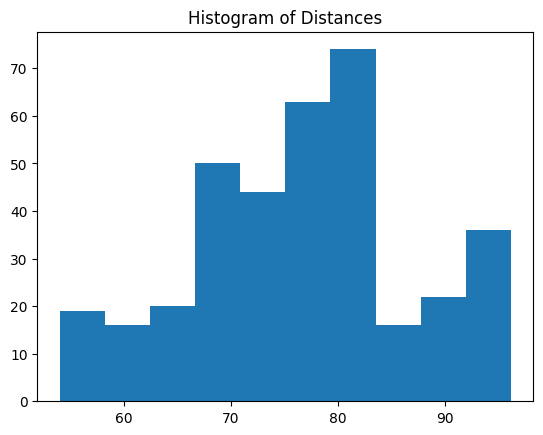

In [11]:
lengths = []
for h in range(len(paths)):
  pathDistance = 0
  for i in range(len(paths[h])-1):
    pathDistance += distance(paths[h][i]-1, paths[h][i+1]-1)
  pathDistance += distance(paths[h][-1]-1, 0)
  lengths.append(pathDistance)

# Finds the shortest path in the list
minDistance = min(lengths)
print("Shortest Path Distance: ", minDistance)

# # # # # # # # # #
# This is the shortest path below, uncomment to find the shortest path (remove the #)
# You may also find the reverse of this path
# print("Shortest path: ", paths[lengths.index(minDistance)])
# # # # # # # # # #

# Inports the ploting and np libraries
from matplotlib import pyplot as plt
import numpy as np

# Creates a histogram of distances
a = np.array(lengths)
plt.hist(a, bins = 10)
plt.title("Histogram of Distances")
plt.show()